<a href="https://colab.research.google.com/github/Jayani/CE888/blob/main/Lab_8/Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import os
# Get all the paths
path, dirs, files = next(os.walk("/content/drive/MyDrive/data/data/cats"))
file_count = len(files)
print("No of files in cats",file_count)
path, dirs, files = next(os.walk("/content/drive/MyDrive/data/data/dogs"))
file_count = len(files)
print("No of files in dogs",file_count)
path, dirs, files = next(os.walk("/content/drive/MyDrive/data/data/horses"))
file_count = len(files)
print("No of files in horses",file_count)
path, dirs, files = next(os.walk("/content/drive/MyDrive/data/data/Humans"))
file_count = len(files)
print("No of files in Humans",file_count)

No of files in cats 202
No of files in dogs 202
No of files in horses 202
No of files in Humans 202


In [83]:
# Make new base directory
original_dataset_dir_cats = "/content/drive/MyDrive/data/data/cats"
original_dataset_dir_dogs = "/content/drive/MyDrive/data/data/dogs"
original_dataset_dir_horses = "/content/drive/MyDrive/data/data/horses"
original_dataset_dir_humans = "/content/drive/MyDrive/data/data/Humans"
base_dir = "/content/cats_dogs_horses_human_images"
os.mkdir(base_dir)

In [84]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [85]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

import shutil
fnames = ['horse-{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horses, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horses, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horses, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_humans, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_humans, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_humans, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [86]:
path, dirs, files = next(os.walk("/content/cats_dogs_horses_human_images/train"))
file_count = len(files)
print("No of train files ",file_count)

path, dirs, files = next(os.walk("/content/cats_dogs_horses_human_images/validation"))
file_count = len(files)
print("No of validation files ",file_count)

path, dirs, files = next(os.walk("/content/cats_dogs_horses_human_images/test"))
file_count = len(files)
print("No of test files ",file_count)

No of train files  560
No of validation files  124
No of test files  120


In [87]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [89]:
def label_img(img):
  #print(img)
  if img.find('-')!=-1:
      #print(img)
      word_label = img.split('-')[0]
      if word_label == 'horse': return 2
      elif word_label == 'rider': return 3
      
  else :
      word_label = img.split('.')[0]
      if word_label == 'dog': return 1
      elif word_label == 'cat': return 0

In [90]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
       
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [91]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

## VGG19 with **Feature** **Extractor**

In [94]:
from tensorflow.keras.layers import Dense, Input, Flatten,Dropout
import tensorflow as tf
from tensorflow.keras.applications import VGG19

model = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [95]:
last_layer = model.get_layer('fc2').output
out = Dense(4, activation='sigmoid', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [96]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [97]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#Early stopping criterion

my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg19.h5', save_best_only=True),
]

In [98]:
#Fitting the model
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=5, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/5
56/56 [==============================] - 11s 190ms/step - loss: 1.4584 - acc: 0.3969 - val_loss: 0.8534 - val_acc: 0.5887
Epoch 2/5
56/56 [==============================] - 10s 183ms/step - loss: 0.6792 - acc: 0.7435 - val_loss: 0.6073 - val_acc: 0.7903
Epoch 3/5
56/56 [==============================] - 10s 184ms/step - loss: 0.5585 - acc: 0.8198 - val_loss: 0.5424 - val_acc: 0.8306
Epoch 4/5
56/56 [==============================] - 10s 185ms/step - loss: 0.4852 - acc: 0.8163 - val_loss: 0.5041 - val_acc: 0.8629
Epoch 5/5
56/56 [==============================] - 10s 186ms/step - loss: 0.4084 - acc: 0.8542 - val_loss: 0.4896 - val_acc: 0.7984


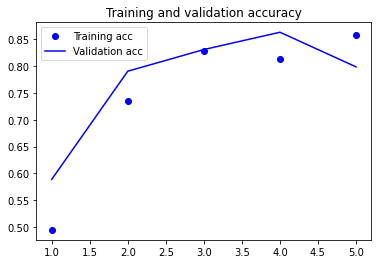

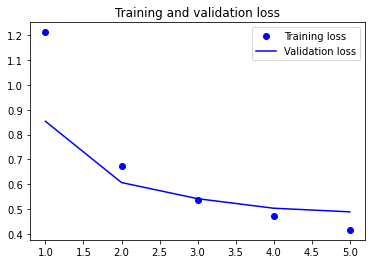

In [99]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [104]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = np.argmax(predictions, axis=1)
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)

Train Accuracy:	 0.8571428656578064
Val Accuracy:	 0.7983871102333069
Test Accuracy:	 0.8666666666666667
Precision:	 0.8752100340810018
Recall:		 0.8666666666666667
F1 Score:	 0.8635085919707892


# Fine Tuning with **VGG19**

In [105]:
model = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [106]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(4, activation='sigmoid', name='output')(x) 
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False


model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [107]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

In [108]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg19.h5', save_best_only=True),
]

In [109]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=5, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/5
56/56 [==============================] - 11s 184ms/step - loss: 1.8151 - acc: 0.4907 - val_loss: 0.3824 - val_acc: 0.8871
Epoch 2/5
56/56 [==============================] - 10s 177ms/step - loss: 0.1813 - acc: 0.9456 - val_loss: 0.3597 - val_acc: 0.8710
Epoch 3/5
56/56 [==============================] - 10s 178ms/step - loss: 0.0335 - acc: 0.9989 - val_loss: 0.2972 - val_acc: 0.8952
Epoch 4/5
56/56 [==============================] - 10s 178ms/step - loss: 0.0114 - acc: 1.0000 - val_loss: 0.3182 - val_acc: 0.8871
Epoch 5/5
56/56 [==============================] - 10s 179ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.3093 - val_acc: 0.9113


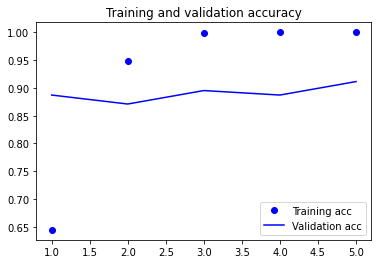

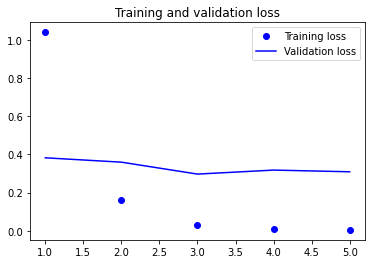

In [110]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [111]:
from sklearn.metrics import accuracy_score

## Test Accuracy using accuracy score 
predictions = model.predict(test_X)

ypred = np.argmax(predictions, axis=1)
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')


print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)

Train Accuracy:	 1.0
Val Accuracy:	 0.9112903475761414
Test Accuracy:	 0.8666666666666667
Precision:	 0.8742306081015758
Recall:		 0.8666666666666667
F1 Score:	 0.8619264611074035
